In [1]:
import pickle
from aemulusnu_massfunction.emulator import *
from aemulusnu_massfunction.fisher_utils import *

In [2]:
M = 10**np.linspace(11, 16, 150)

In [3]:
h = fiducial_cosmology['H0']/100

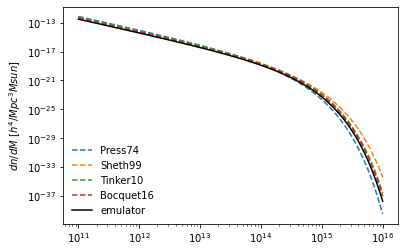

In [9]:
dn_dM = [emulator.predict_dndM(fiducial_cosmology, 0.8, M_c) for M_c in M]# h^4 / Mpc^3 Msun

hmfs = []
# Press & Schechter mass function
hmfs.append(ccl.halos.MassFuncPress74(mass_def='200m', mass_def_strict=False))

# Sheth & Tormen mass function
hmfs.append(ccl.halos.MassFuncSheth99(mass_def='200m', mass_def_strict=False))

# Tinker 2010 mass function
hmfs.append(ccl.halos.MassFuncTinker10(mass_def='200m', mass_def_strict=False))


# Bocquet 2016 mass function
hmfs.append(ccl.halos.MassFuncBocquet16(mass_def='200m'))


# Let's plot all of them at z=0
plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(0.8))
    plt.plot(M, nm/(h**4 * M * np.log(10)), '--', label=mf.name)
    
plt.plot(M, dn_dM, 'k',label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)

In [5]:
mf(fiducial_ccl_cosmo, 1e13/h, redshiftToScale(0.8))

0.00023498135569343786

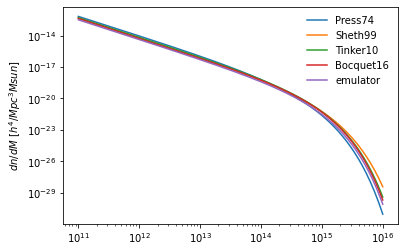

In [6]:
z = 0.2


dn_dM = [emulator.predict_dndM(fiducial_cosmology, z, M_c) for M_c in M]# h^4 / Mpc^3 Msun

plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(z))
    plt.plot(M, nm/(h**4 * M * np.log(10)), label=mf.name)
    
plt.plot(M, dn_dM, label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)

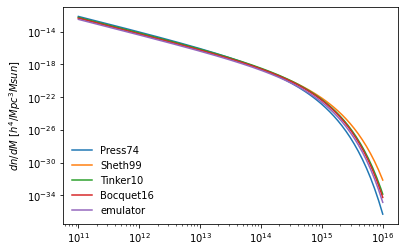

In [7]:
z = .6


dn_dM = [emulator.predict_dndM(fiducial_cosmology, z, M_c) for M_c in M]# h^4 / Mpc^3 Msun

plt.figure()
for mf in hmfs:
    nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(z))
    plt.plot(M, nm/(h**4 * M * np.log(10)), label=mf.name)
    
plt.plot(M, dn_dM, label='emulator')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
plt.legend(frameon=False)